In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from os import path

plt.rcParams['font.size'] = 12
# plt.rcParams['axes.linewidth'] = 3.0


In [2]:
pth = path.abspath('images')
pth

'c:\\Users\\gabri\\Workplace\\LabEstat\\code\\images'

In [3]:
df_institutes = pd.read_csv('data/out/dataInstitutes.csv', encoding='latin1', header=1)

In [4]:
df_institutes.columns

Index(['Instituto/Curso', ' Canc.por Reopção', 'Cancelamento por CRPL Zero',
       ' Decurso de Prazo Máximo P/ Conclusão de Curso', 'Desistência',
       'Prescrito', 'Limite de Trancamento', 'Transferência para outra IES',
       'Outro', 'Total Geral', ' Canc.por Reopção.1',
       'Cancelamento por CRPL Zero.1',
       ' Decurso de Prazo Máximo P/ Conclusão de Curso.1', 'Desistência.1',
       'Prescrito.1', 'Limite de Trancamento.1',
       'Transferência para outra IES.1', 'Outro.1', 'Total Geral.1',
       ' Canc.por Reopção.2', 'Cancelamento por CRPL Zero.2',
       ' Decurso de Prazo Máximo P/ Conclusão de Curso.2', 'Desistência.2',
       'Prescrito.2', 'Limite de Trancamento.2',
       'Transferência para outra IES.2', 'Outro.2', 'Total Geral.2',
       ' Canc.por Reopção.3', 'Cancelamento por CRPL Zero.3',
       ' Decurso de Prazo Máximo P/ Conclusão de Curso.3', 'Desistência.3',
       'Prescrito.3', 'Limite de Trancamento.3',
       'Transferência para outra IES.3', 'Ou

In [5]:
df_institutes

,Instituto/Curso,Canc.por Reopção,Cancelamento por CRPL Zero,Decurso de Prazo Máximo P/ Conclusão de Curso,Desistência,Prescrito,Limite de Trancamento,Transferência para outra IES,Outro,Total Geral,...,Total Geral.6,Canc.por Reopção.7,Cancelamento por CRPL Zero.7,Decurso de Prazo Máximo P/ Conclusão de Curso.7,Desistência.7,Prescrito.7,Limite de Trancamento.7,Transferência para outra IES.7,Outro.7,Total Geral.7
0,Instituto Amazônico de Agriculturas Familiare...,0,0,0,0,0,0,0,0,0,...,2,1,0,0,12,0,0,0,0,13
1,Instituto de Ciências Biológicas - ICB,4,0,22,19,40,0,0,2,87,...,30,4,0,0,33,0,0,0,0,37
2,Instituto de Ciências da Arte - ICA,2,0,41,26,32,20,1,0,122,...,32,10,0,0,18,0,0,0,0,28
3,Instituto de Ciências da Educação - ICED,8,0,50,31,142,0,3,2,236,...,23,1,0,0,16,0,0,1,0,18
4,Instituto de Ciências da Saúde - ICS,3,0,55,23,66,0,0,2,149,...,49,6,0,0,64,0,0,0,0,70
5,Instituto de Ciências Exatas e Naturais - ICEN,13,0,216,74,108,0,2,2,415,...,114,16,0,0,107,0,0,0,0,123
6,Instituto de Ciências Jurídicas - ICJ,0,0,18,15,0,0,0,1,34,...,15,0,0,0,11,0,0,2,0,13
7,Instituto de Ciências Sociais Aplicadas - ICSA,9,0,201,60,3,0,4,3,280,...,66,16,0,0,108,0,0,0,1,125
8,Instituto de Educação Matemática e Científica ...,1,0,0,10,0,0,0,1,12,...,18,0,0,0,7,0,0,0,0,7
9,Instituto de Filosofia e Ciências Humanas - IFCH,11,1,205,33,5,2,4,5,266,...,86,12,0,6,55,1,1,0,0,75


In [6]:
df_institutes.describe()

,Canc.por Reopção,Cancelamento por CRPL Zero,Decurso de Prazo Máximo P/ Conclusão de Curso,Desistência,Prescrito,Limite de Trancamento,Transferência para outra IES,Outro,Total Geral,Canc.por Reopção.1,...,Total Geral.6,Canc.por Reopção.7,Cancelamento por CRPL Zero.7,Decurso de Prazo Máximo P/ Conclusão de Curso.7,Desistência.7,Prescrito.7,Limite de Trancamento.7,Transferência para outra IES.7,Outro.7,Total Geral.7
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,11.857143,0.285714,167.000000,63.714286,56.714286,3.142857,3.000000,4.571429,310.285714,8.428571,...,96.142857,17.000000,0.0,1.000000,92.142857,0.142857,0.142857,0.714286,0.142857,111.285714
std,21.052525,0.611250,301.860385,112.952290,107.924780,7.594098,5.533117,8.382347,551.674852,15.062507,...,171.448067,30.283278,0.0,2.353394,163.998995,0.363137,0.363137,1.437336,0.363137,197.697293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.0,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,2.250000,0.000000,24.000000,20.000000,0.000000,0.000000,0.000000,1.000000,69.000000,3.000000,...,24.250000,1.750000,0.0,0.000000,16.500000,0.000000,0.000000,0.000000,0.000000,20.500000
50%,7.000000,0.000000,52.500000,28.500000,4.000000,0.000000,1.000000,2.000000,139.500000,3.500000,...,40.500000,11.000000,0.0,0.000000,42.500000,0.000000,0.000000,0.000000,0.000000,58.000000
75%,11.750000,0.000000,204.000000,54.000000,59.500000,0.000000,3.750000,3.000000,276.500000,5.000000,...,81.000000,16.000000,0.0,0.000000,96.250000,0.000000,0.000000,0.750000,0.000000,111.000000
max,83.000000,2.000000,1169.000000,446.000000,397.000000,22.000000,21.000000,32.000000,2172.000000,59.000000,...,673.000000,119.000000,0.0,7.000000,645.000000,1.000000,1.000000,5.000000,1.000000,779.000000


In [99]:
desistencias = df_institutes[[df_institutes.columns[4+9*t] for t in range(8)]].sum()
desistencias

Desistência       892
Desistência.1    1680
Desistência.2     784
Desistência.3    1538
Desistência.4     876
Desistência.5    1164
Desistência.6     820
Desistência.7    1290
dtype: int64

In [74]:
anos=[x for x in range(2014,2022)]
anos

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

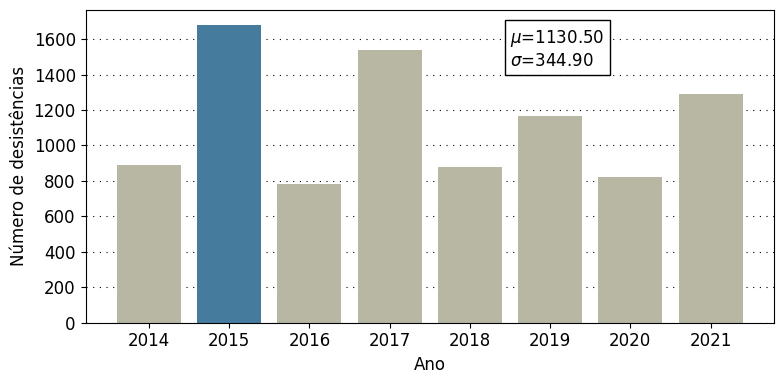

In [98]:
plt.figure(figsize=(8,4))

color_map = ["#b7b7a4" for _ in range(13)]
color_map[1] = "#457b9d"

plt.bar(anos,desistencias.values, color=color_map, zorder=2)
# plt.title('Evasão total na UFPA por ano')
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Número de desistências',fontsize=12)
plt.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.yticks(np.arange(0,1800,200))
plt.text(2018.5,1450,f'$\mu$={desistencias.mean():.2f}\n$\sigma$={desistencias.std():.2f}',bbox=dict(facecolor='white',edgecolor='black'))
plt.tight_layout()
plt.savefig('gráficos/desis.pdf')

In [ ]:
plt.figure()

In [7]:
institutos = df_institutes['Instituto/Curso']
try:
    institutos[0] = 'Instituto Amazônico de  Agriculturas Familiares - INEAF'
    institutos[7] = 'Instituto de Ciências Sociais Aplicadas - ICSA'
except: 
    pass

C:\Users\gabri\AppData\Local\Temp\ipykernel_4032\2354361854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  institutos[0] = 'Instituto Amazônico de  Agriculturas Familiares - INEAF'
C:\Users\gabri\AppData\Local\Temp\ipykernel_4032\2354361854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  institutos[7] = 'Instituto de Ciências Sociais Aplicadas - ICSA'


In [8]:
df_total = df_institutes.filter(regex=r'Total', axis=1)

xyear = [x for x in range(2014,2022)]

df_total = df_total.set_index(institutos)

df_total.iloc[0,1] = 0

df_total = df_total.astype(int)

df_total = df_total.rename(columns={a:b for a,b in zip(df_total.columns,xyear)})


In [9]:
for i in df_total.index:
    print(i, end='; ')

Instituto Amazônico de  Agriculturas Familiares - INEAF; Instituto de Ciências Biológicas - ICB ; Instituto de Ciências da Arte - ICA ; Instituto de Ciências da Educação - ICED ; Instituto de Ciências da Saúde - ICS ; Instituto de Ciências Exatas e Naturais - ICEN ; Instituto de Ciências Jurídicas - ICJ ; Instituto de Ciências Sociais Aplicadas - ICSA; Instituto de Educação Matemática e Científica - IEMCI ; Instituto de Filosofia e Ciências Humanas - IFCH ; Instituto de Geociências - IG ; Instituto de Letras e Comunicação - ILC ; Instituto de Tecnologia - ITEC ; Total Geral; 

In [10]:
df_total.shape

(14, 8)

In [11]:
len(df_total.index)

14

In [12]:
siglas = []
for i in df_total[:-1].index:
    siglas.append(re.findall(r'I[A-Z]+',i)[0])
siglas

['INEAF',
 'ICB',
 'ICA',
 'ICED',
 'ICS',
 'ICEN',
 'ICJ',
 'ICSA',
 'IEMCI',
 'IFCH',
 'IG',
 'ILC',
 'ITEC']

In [13]:
df_total.loc['Total Geral'].std()

1137.142000179146

In [14]:
def plotting(df):
    global xyear, sigla
    lenght = df.shape[0]
    fig, axs = plt.subplots(int(np.ceil(lenght/2)),2, figsize=(12,30))
    for index, inst in enumerate(df.index):
        y = index%2
        x = int(np.floor(index/2))
        v = df.loc[inst]
        axs[x,y].set_title(inst)
        sns.barplot(y=v,x=df.columns, ax=axs[x,y])
        # axs[x,y].set_xticklabels(sigla)
        # axs[x,y].set_ylabel('')
        # axs[x,y].set_xlabel('Age')
        # axs[x,y].bar(xyear, v.values)
        # axs[x,y].set_xticklabels(axs[x,y].get_xticklabels(), rotation=45)
    plt.show()

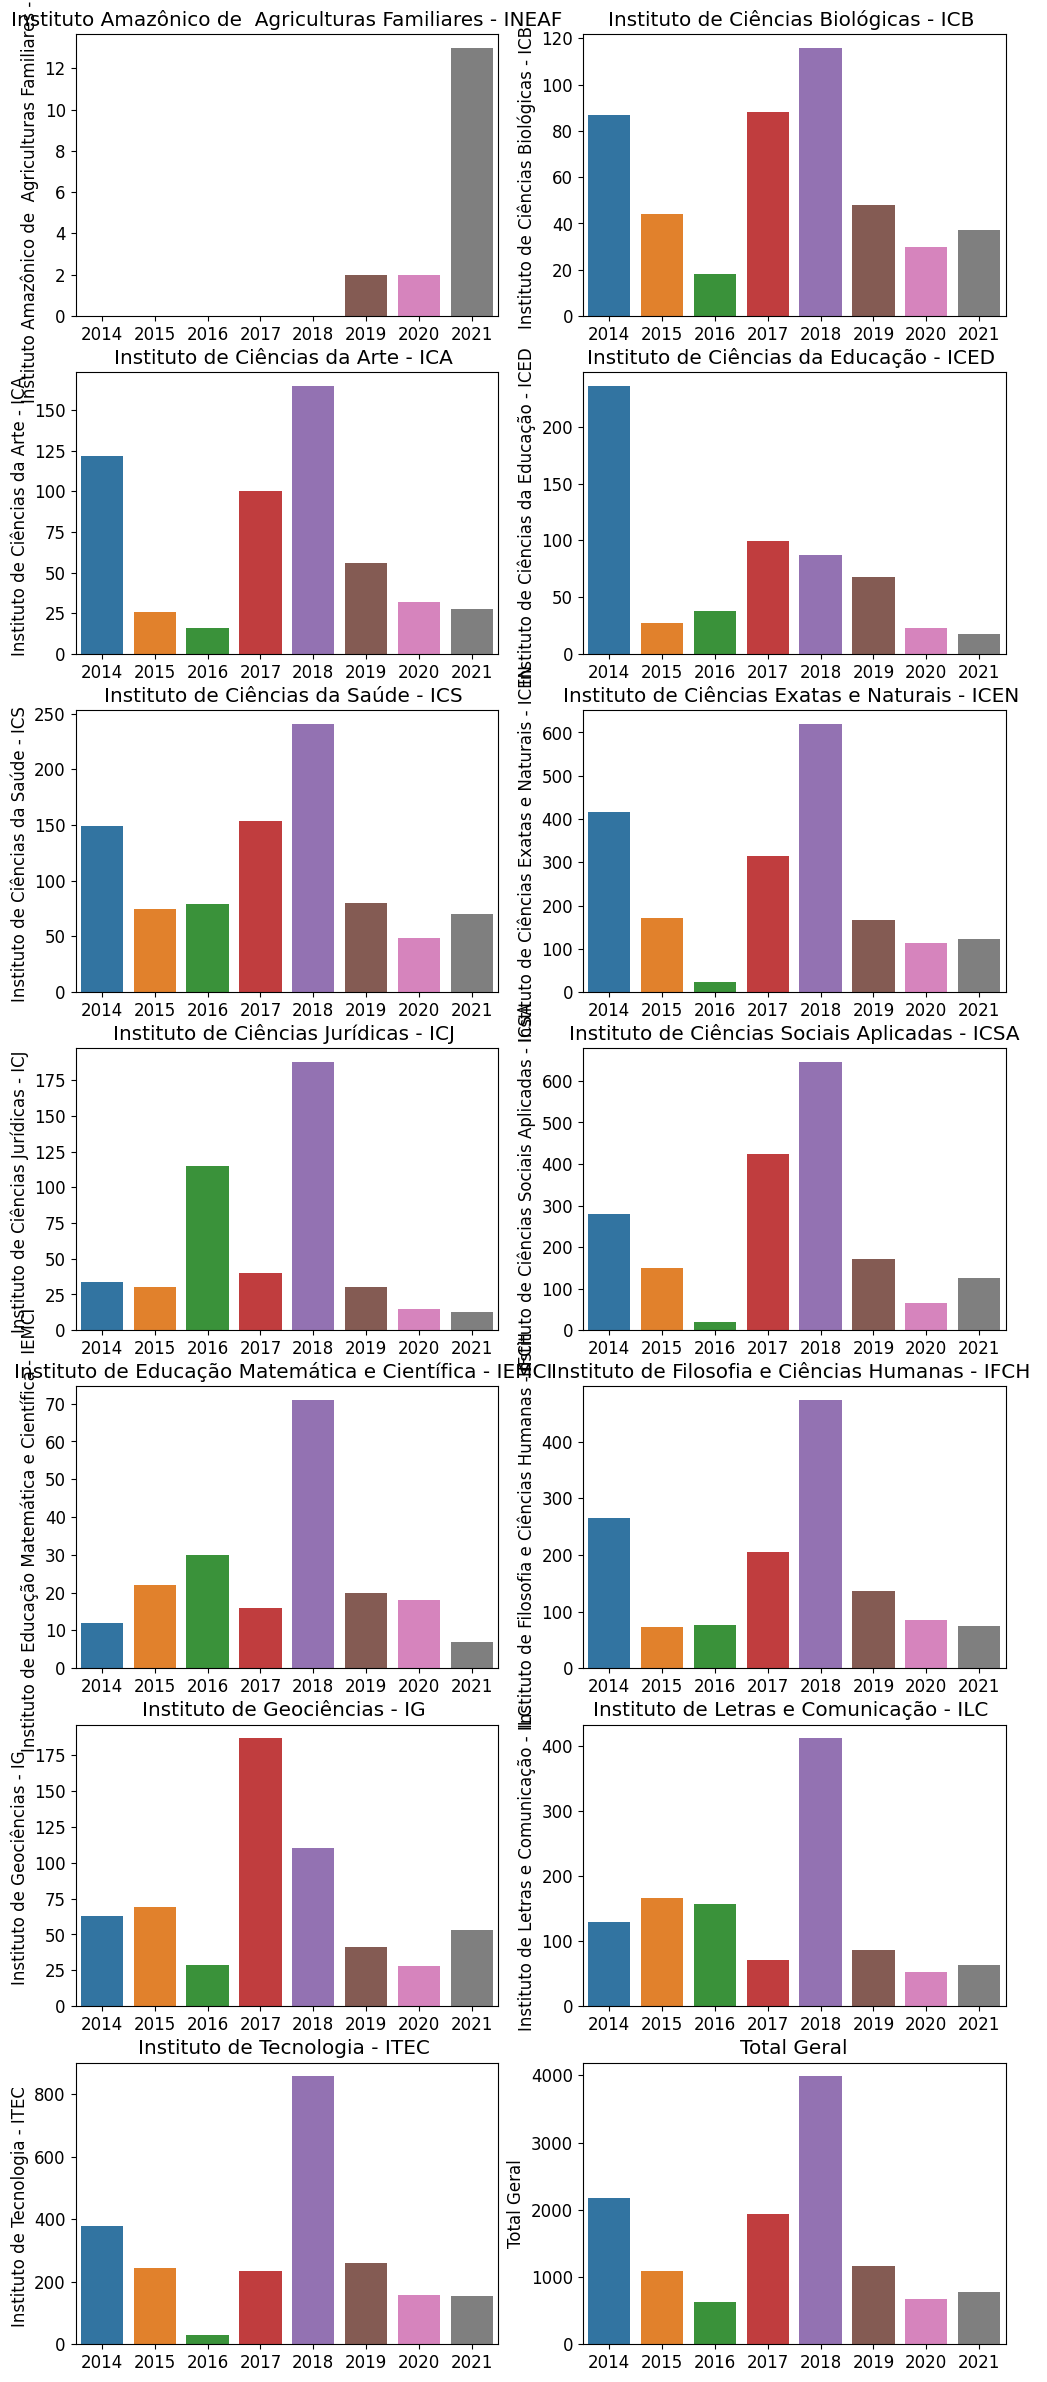

In [15]:
plotting(df_total)

In [16]:
df_inv = df_total[:-1].T
df_inv

Instituto/Curso,Instituto Amazônico de Agriculturas Familiares - INEAF,Instituto de Ciências Biológicas - ICB,Instituto de Ciências da Arte - ICA,Instituto de Ciências da Educação - ICED,Instituto de Ciências da Saúde - ICS,Instituto de Ciências Exatas e Naturais - ICEN,Instituto de Ciências Jurídicas - ICJ,Instituto de Ciências Sociais Aplicadas - ICSA,Instituto de Educação Matemática e Científica - IEMCI,Instituto de Filosofia e Ciências Humanas - IFCH,Instituto de Geociências - IG,Instituto de Letras e Comunicação - ILC,Instituto de Tecnologia - ITEC
2014,0,87,122,236,149,415,34,280,12,266,63,130,378
2015,0,44,26,27,75,172,30,149,22,72,69,167,244
2016,0,18,16,38,79,24,115,19,30,76,29,157,30
2017,0,88,100,99,154,315,40,424,16,206,187,71,234
2018,0,116,165,87,241,620,188,646,71,474,110,413,859
2019,2,48,56,68,80,167,30,172,20,137,41,87,259
2020,2,30,32,23,49,114,15,66,18,86,28,52,158
2021,13,37,28,18,70,123,13,125,7,75,53,63,154


In [17]:
df_inv.mean()

Instituto/Curso
Instituto Amazônico de  Agriculturas Familiares - INEAF      2.125
Instituto de Ciências Biológicas - ICB                      58.500
Instituto de Ciências da Arte - ICA                         68.125
Instituto de Ciências da Educação - ICED                    74.500
Instituto de Ciências da Saúde - ICS                       112.125
Instituto de Ciências Exatas e Naturais - ICEN             243.750
Instituto de Ciências Jurídicas - ICJ                       58.125
Instituto de Ciências Sociais Aplicadas - ICSA             235.125
Instituto de Educação Matemática e Científica - IEMCI       24.500
Instituto de Filosofia e Ciências Humanas - IFCH           174.000
Instituto de Geociências - IG                               72.500
Instituto de Letras e Comunicação - ILC                    142.500
Instituto de Tecnologia - ITEC                             289.500
dtype: float64

In [18]:
df_inv.sum().sum()

12443

In [19]:
df_total.sum().values/2

array([2172. , 1097. ,  631. , 1934. , 3990. , 1164.5,  673. ,  779. ])

In [20]:
df_total.sum().values/2

array([2172. , 1097. ,  631. , 1934. , 3990. , 1164.5,  673. ,  779. ])

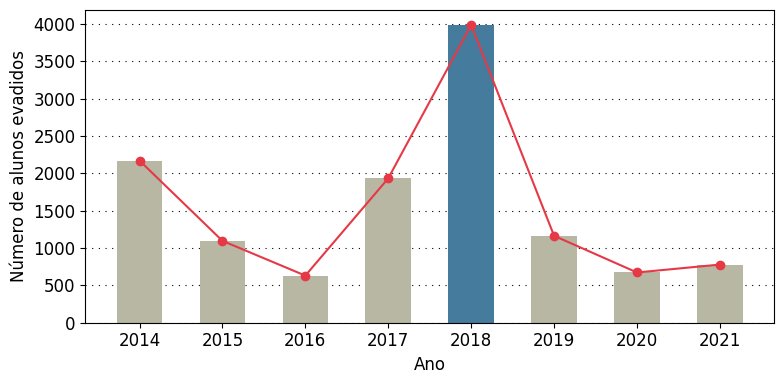

In [21]:
plt.figure(figsize=(8,4))

color_map = ["#b7b7a4" for _ in range(13)]
color_map[4] = "#457b9d"

plt.bar(x=df_total.sum().index ,height=df_total.sum().values/2, width=0.55,color=color_map ,zorder=2)
plt.plot(df_total.sum()/2,'o-',color='#e63946')
# plt.title('Evasão total na UFPA por ano')
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Número de alunos evadidos',fontsize=12)
plt.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.tight_layout()

plt.savefig('gráficos/Evasão total na UFPA por ano.pdf')

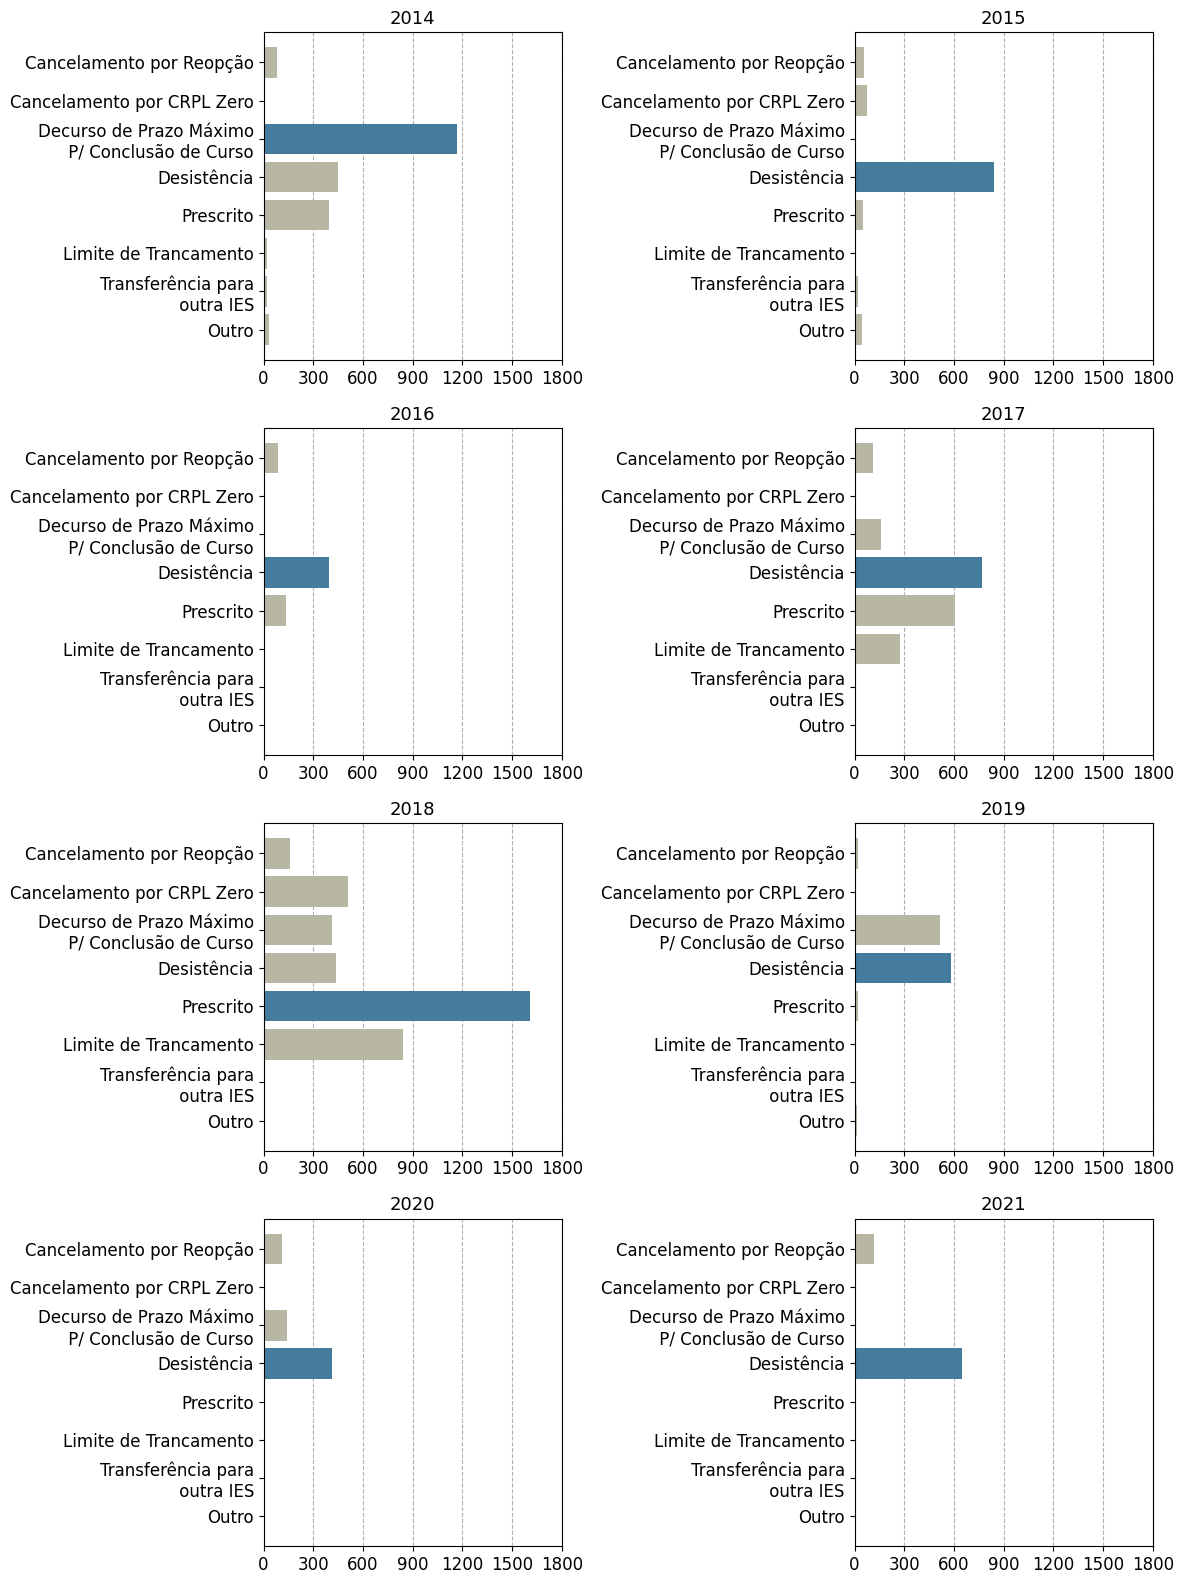

In [22]:
re.compile(r'[A-Za-záéíúâêãõç]+')

fig, axs = plt.subplots(4,2,figsize=(12,16))
for t in range(0,8):
    x = int(np.floor(t/2))
    y = t%2
    # print(df_institutes.iloc[13,1*t:9*t])
    data = df_institutes.iloc[13,1+t*9:9*(t+1)]
    data = data.set_axis([0,1,2,3,4,5,6,7])
    n = pd.to_numeric(data).idxmax()
    category = list(data.index)
    category[0] = 'Cancelamento por Reopção'
    category[1] = 'Cancelamento por CRPL Zero'
    category[2] = 'Decurso de Prazo Máximo\n P/ Conclusão de Curso'
    category[3] = 'Desistência'
    category[4] = 'Prescrito'
    category[5] = 'Limite de Trancamento'
    category[6] = 'Transferência para\n outra IES'
    category[7] = 'Outro'
    color_map = ["#b7b7a4" for _ in range(7)]
    color_map[7-n] = "#457b9d"
    axs[x,y].barh(width=data[::-1],y=category[::-1],color=color_map, zorder=2)
    axs[x,y].set_xticks([x for x in range(0,1900,300)])
    axs[x,y].set_title(f'{2014+t}', fontsize=13)
    axs[x,y].set_yticks(category)
    axs[x,y].grid(zorder=0,linestyle='--',axis='x')
    plt.tight_layout()
plt.savefig('gráficos/N_alunos_evadidos_tipo_de_evasão.pdf',
            dpi=400)
plt.show()

In [23]:
var2 = lambda t: df_institutes.iloc[13,1+t*9:9*(t+1)]

In [24]:
data_p = {u:var2(v).values for (u,v) in zip(range(2014,2022),range(0,8))}
data_p

{2014: array([83, 2, 1169, 446, 397, 22, 21, 32], dtype=object),
 2015: array([59, 73, 6, 840, 50, 7, 19, 43], dtype=object),
 2016: array([88, 0, 1, 392, 135, 0, 7, 8], dtype=object),
 2017: array([109, 8, 159, 769, 608, 271, 3, 7], dtype=object),
 2018: array([162, 507, 413, 438, 1607, 844, 9, 10], dtype=object),
 2019: array([19, 3, 518, 582, 22, 6, 7, 12], dtype=object),
 2020: array([114, 0, 144, 410, 3, 0, 2, 0], dtype=object),
 2021: array([119, 0, 7, 645, 1, 1, 5, 1], dtype=object)}

In [25]:
data_type2 = pd.DataFrame(data_p, index=category)
data_type2 = data_type2[data_type2.columns[::-1]]

In [26]:
dta_type = data_type2.T.sum()/12438
dta_type

Cancelamento por Reopção                            0.06054
Cancelamento por CRPL Zero                         0.047676
Decurso de Prazo Máximo\n P/ Conclusão de Curso    0.194324
Desistência                                        0.363563
Prescrito                                          0.226966
Limite de Trancamento                              0.092539
Transferência para\n outra IES                     0.005869
Outro                                              0.009085
dtype: object

In [27]:
var = lambda t: df_institutes.iloc[13,1+t*9:9*(t+1)]/df_institutes.iloc[13,1+t*9:9*(t+1)].sum()


In [28]:
var(3)

 Canc.por Reopção.3                                  0.05636
Cancelamento por CRPL Zero.3                        0.004137
 Decurso de Prazo Máximo P/ Conclusão de Curso.3    0.082213
Desistência.3                                       0.397622
Prescrito.3                                         0.314374
Limite de Trancamento.3                             0.140124
Transferência para outra IES.3                      0.001551
Outro.3                                             0.003619
Name: 13, dtype: object

In [29]:
data_prop = {u:var(v).values for (u,v) in zip(range(2014,2022),range(0,8))}
data_prop

{2014: array([0.03821362799263352, 0.0009208103130755065, 0.5382136279926335,
        0.20534069981583794, 0.18278084714548803, 0.010128913443830571,
        0.009668508287292817, 0.014732965009208104], dtype=object),
 2015: array([0.053783044667274384, 0.06654512306289881, 0.0054694621695533276,
        0.7657247037374658, 0.04557885141294439, 0.006381039197812215,
        0.01731996353691887, 0.03919781221513218], dtype=object),
 2016: array([0.13946117274167988, 0.0, 0.001584786053882726, 0.6212361331220285,
        0.21394611727416799, 0.0, 0.011093502377179081,
        0.012678288431061807], dtype=object),
 2017: array([0.05635987590486039, 0.004136504653567736, 0.08221302998965874,
        0.3976215098241985, 0.31437435367114785, 0.14012409513960702,
        0.0015511892450879006, 0.0036194415718717684], dtype=object),
 2018: array([0.0406015037593985, 0.12706766917293233, 0.10350877192982456,
        0.10977443609022557, 0.4027568922305764, 0.21152882205513784,
        0.0022556

In [30]:
data_type = pd.DataFrame(data_prop, index=category)
data_type = data_type[data_type.columns[::-1]]

In [31]:
data_type.insert(0,"Total",dta_type, True)

In [32]:
data_type

,Total,2021,2020,2019,2018,2017,2016,2015,2014
Cancelamento por Reopção,0.06054,0.15276,0.169391,0.016253,0.040602,0.05636,0.139461,0.053783,0.038214
Cancelamento por CRPL Zero,0.047676,0.0,0.0,0.002566,0.127068,0.004137,0.0,0.066545,0.000921
Decurso de Prazo Máximo\n P/ Conclusão de Curso,0.194324,0.008986,0.213967,0.443114,0.103509,0.082213,0.001585,0.005469,0.538214
Desistência,0.363563,0.827985,0.609212,0.497861,0.109774,0.397622,0.621236,0.765725,0.205341
Prescrito,0.226966,0.001284,0.004458,0.01882,0.402757,0.314374,0.213946,0.045579,0.182781
Limite de Trancamento,0.092539,0.001284,0.0,0.005133,0.211529,0.140124,0.0,0.006381,0.010129
Transferência para\n outra IES,0.005869,0.006418,0.002972,0.005988,0.002256,0.001551,0.011094,0.01732,0.009669
Outro,0.009085,0.001284,0.0,0.010265,0.002506,0.003619,0.012678,0.039198,0.014733


<Figure size 800x400 with 0 Axes>

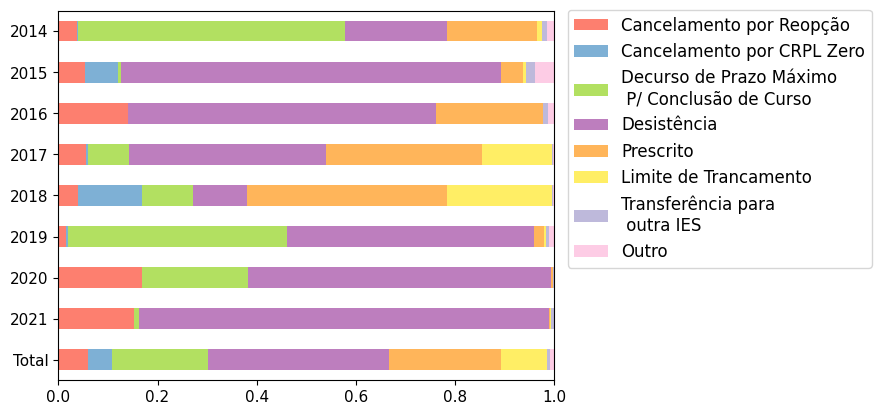

In [33]:
plt.figure(figsize=(8,4))
ax = data_type.T.plot(kind="barh",stacked=True, color=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
)
ax.legend(bbox_to_anchor=(1.01,1.025))
ax.tick_params(labelsize=11)
# plt.title('Evasão por tipo em cada ano')
ax.set_xlim(0,1)
plt.show()
# ax.figure.savefig('gráficos\\Tipo_evasão_ano.pdf')

In [34]:
n_alunos = [45,210,210,220,530,500,200,600,90,350,150,300,700]
dic  = {x:y for (x,y) in zip(institutos,n_alunos)}

df_prop = pd.DataFrame()

for index, year in enumerate(df_inv.index):
    can = pd.Series(np.ones(13))
    i=0
    for x, y in zip(df_inv.loc[year],dic.values()):
        can[i] = x/y
        i+=1
    df_prop.insert(index, f'{year}',can)

df_proportional = df_prop.T
df_prop = df_proportional.rename(columns={a:b for a,b in zip(df_proportional.columns,siglas)})
df_prop = df_prop.set_index(df_prop.index.astype(int))

In [35]:
(np.random.randint(1,8),np.random.randint(1,13))

(5, 8)

In [36]:
df_prop.T

,2014,2015,2016,2017,2018,2019,2020,2021
INEAF,0.000000,0.000000,0.000000,0.000000,0.000000,0.044444,0.044444,0.288889
ICB,0.414286,0.209524,0.085714,0.419048,0.552381,0.228571,0.142857,0.176190
ICA,0.580952,0.123810,0.076190,0.476190,0.785714,0.266667,0.152381,0.133333
ICED,1.072727,0.122727,0.172727,0.450000,0.395455,0.309091,0.104545,0.081818
ICS,0.281132,0.141509,0.149057,0.290566,0.454717,0.150943,0.092453,0.132075
ICEN,0.830000,0.344000,0.048000,0.630000,1.240000,0.334000,0.228000,0.246000
ICJ,0.170000,0.150000,0.575000,0.200000,0.940000,0.150000,0.075000,0.065000
ICSA,0.466667,0.248333,0.031667,0.706667,1.076667,0.286667,0.110000,0.208333
IEMCI,0.133333,0.244444,0.333333,0.177778,0.788889,0.222222,0.200000,0.077778
IFCH,0.760000,0.205714,0.217143,0.588571,1.354286,0.391429,0.245714,0.214286


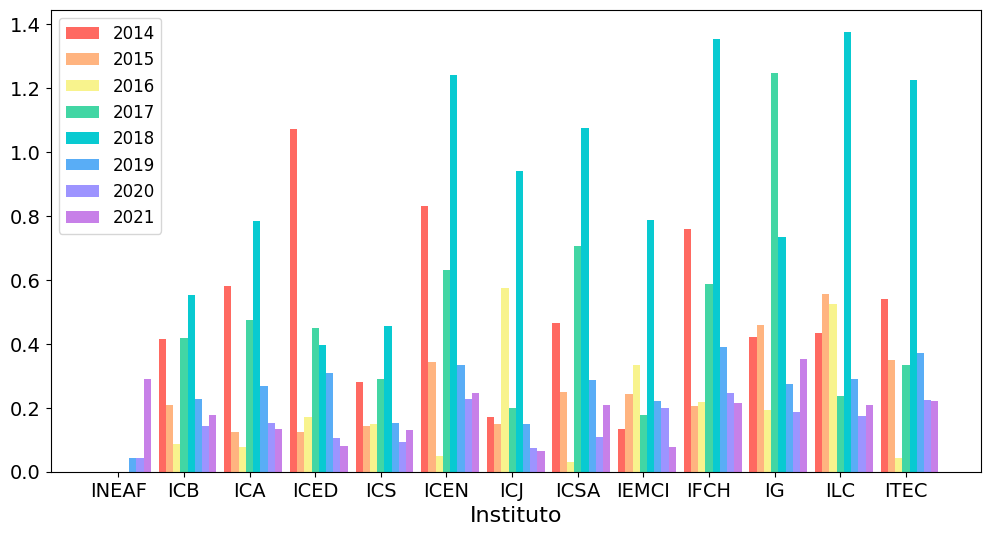

In [37]:
fig = plt.figure(figsize=(12,6))

bar_width = 0.11
positions = np.arange(len(df_prop.columns))

colors = ['#ff6961',
'#ffb480',
'#f8f38d',
'#42d6a4',
'#08cad1',
'#59adf6',
'#9d94ff',
'#c780e8']

ax = fig.add_subplot(1,1,1)
# ax.grid(linestyle=':',zorder=0)
ax.bar(positions - 3*bar_width, df_prop.loc[2014], width=bar_width, color=colors[0], label = '2014',zorder=2)
ax.bar(positions - 2*bar_width, df_prop.loc[2015], width=bar_width, color=colors[1], label='2015',zorder=2)
ax.bar(positions - bar_width, df_prop.loc[2016], width=bar_width, color=colors[2], label = '2016',zorder=2)
ax.bar(positions, df_prop.loc[2017], width=bar_width, color=colors[3], label = '2017',zorder=2)
ax.bar(positions + bar_width, df_prop.loc[2018], width=bar_width, color=colors[4], label= '2018',zorder=2)
ax.bar(positions + 2*bar_width, df_prop.loc[2019], width=bar_width, color=colors[5], label = '2019',zorder=2)
ax.bar(positions + 3*bar_width, df_prop.loc[2020], width=bar_width, color=colors[6], label = '2020',zorder=2)
ax.bar(positions + 4*bar_width, df_prop.loc[2021], width=bar_width, color=colors[7], label = '2021',zorder=2)
ax.legend(loc='upper left')

# ax.set_title('Evasão Relativa por Instituto por Ano')
ax.set_xticks(range(0,13))
ax.set_xticklabels(siglas)
ax.tick_params(axis='both', which='major', labelsize=14)


# ax.set_xticks(range(0,13))
# ax.set_xticklabels(siglas, fontsize=14)
# tick = [x for x in range(0,900,100)]
ax.set_xlabel('Instituto',fontsize=16)
# ax.set_ylabel('Número de alunos evadidos',fontsize=14)
# ax.set_yticks(tick)
# ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('gráficos\\evas.pdf', dpi=400)
plt.show()


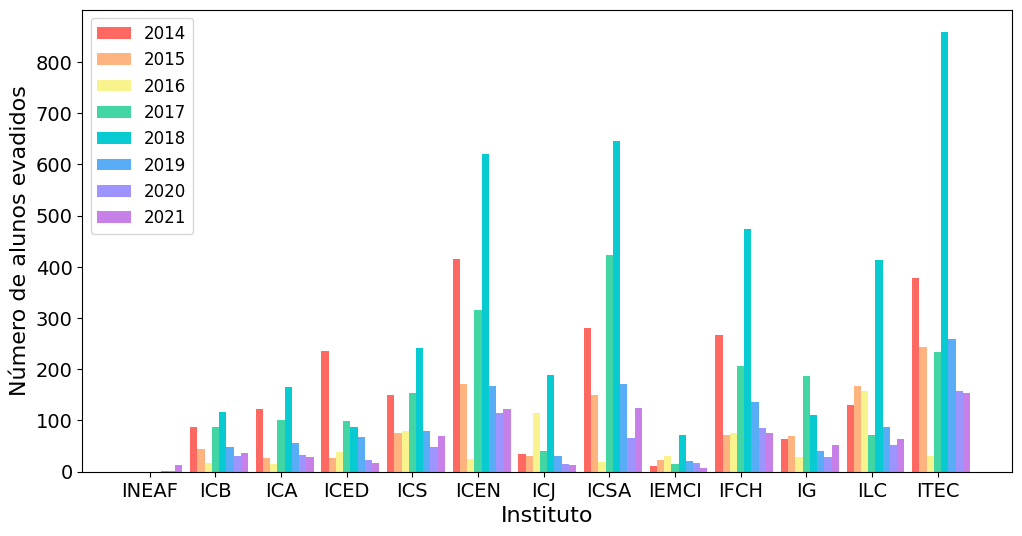

In [38]:
fig = plt.figure(figsize=(12,6))

bar_width = 0.11
positions = np.arange(len(df_inv.columns))

colors = ['#ff6961',
'#ffb480',
'#f8f38d',
'#42d6a4',
'#08cad1',
'#59adf6',
'#9d94ff',
'#c780e8']

ax = fig.add_subplot(1,1,1)

ax.bar(positions - 3*bar_width, df_inv.loc[2014], width=bar_width, color=colors[0], label = '2014')
ax.bar(positions - 2*bar_width, df_inv.loc[2015], width=bar_width, color=colors[1], label='2015')
ax.bar(positions - bar_width, df_inv.loc[2016], width=bar_width, color=colors[2], label = '2016')
ax.bar(positions, df_inv.loc[2017], width=bar_width, color=colors[3], label = '2017')
ax.bar(positions + bar_width, df_inv.loc[2018], width=bar_width, color=colors[4], label= '2018')
ax.bar(positions + 2*bar_width, df_inv.loc[2019], width=bar_width, color=colors[5], label = '2019')
ax.bar(positions + 3*bar_width, df_inv.loc[2020], width=bar_width, color=colors[6], label = '2020')
ax.bar(positions + 4*bar_width, df_inv.loc[2021], width=bar_width, color=colors[7], label = '2021')
ax.legend(loc='upper left')

ax.set_xticks(range(0,13))
ax.set_xticklabels(siglas, fontsize=14)
tick = [x for x in range(0,900,100)]
ax.set_xlabel('Instituto',fontsize=16)
ax.set_ylabel('Número de alunos evadidos',fontsize=16)
ax.set_yticks(tick)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('Inst.pdf',dpi=400)
plt.show()
